[Back](https://keqideng.github.io/data_analysis_portfolio_project/)
# Ontario Covid-19 Data Analysis
Date Sept 29 2021

Prepared by ***Keqi Deng***

Data Source: [Ontario Open Data](https://data.ontario.ca/en/dataset)

## Note
This analysis used public data provided by Ontario Public Health. The main purpose of this analysis is to find the correlation between different attributes. Analysis methods are not from academical research. The author of this report does not have background in epidemiology. This study is solely for data analysis demonstration purpose only.

## Analysis Goals
* Identify COVID-19 daily new case trend in districts with most COVID-19 cases
* Calculate the change percentage rate for daily COVID-19 cases
* Identify the districts with higher than average increasing rate
* Visualize the vaccination rate of different public health district
* Plot scatter plot to see if there's any correlation between recent daily case increasing rate and the vaccination rate
* Visualize the infection rate per 100k people in different age groups, comparing the vaccine effectiveness

## Import Packages

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import io
from _datetime import datetime
import wordcloud

## Import Data
In order to import the online csv datasets from public data, use the following instant function to simplify the process:

In [39]:
def df_csv(url):
    source = requests.get(url).text
    reader = io.StringIO(source)
    return pd.read_csv(reader)

Then, import [Status of COVID-19 cases in Ontario](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11) and [Daily change in cases by PHU](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f) datasets from Ontario Government website:

In [40]:
on_covid_status_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv')
on_covid_status_df['Reported Date'] = pd.to_datetime(on_covid_status_df['Reported Date'])

print(on_covid_status_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 29 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Reported Date                                              609 non-null    datetime64[ns]
 1   Confirmed Negative                                         47 non-null     float64       
 2   Presumptive Negative                                       12 non-null     float64       
 3   Presumptive Positive                                       25 non-null     float64       
 4   Confirmed Positive                                         607 non-null    float64       
 5   Resolved                                                   597 non-null    float64       
 6   Deaths                                                     569 non-null    float64       
 7   Total Cases                        

In [41]:
phu_daily_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv')
phu_daily_df['Date'] = pd.to_datetime(phu_daily_df['Date'])

print(phu_daily_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            562 non-null    datetime64[ns]
 1   Algoma_District                 559 non-null    float64       
 2   Brant_County                    559 non-null    float64       
 3   Chatham_Kent                    559 non-null    float64       
 4   Durham_Region                   559 non-null    float64       
 5   Eastern_Ontario                 559 non-null    float64       
 6   Grey_Bruce                      559 non-null    float64       
 7   Haldimand_Norfolk               559 non-null    float64       
 8   Haliburton_Kawartha_Pine_Ridge  559 non-null    float64       
 9   Halton_Region                   559 non-null    float64       
 10  City_of_Hamilton                559 non-null    float64       
 11  Hastin

## Daily New Case Analysis
Calculate the rolling average of the different health regions:


In [42]:
phu_daily_avg_df = phu_daily_df.rolling(window = 7).mean()
phu_daily_avg_df.drop('Total', axis = 1, inplace = True)
phu_daily_avg_df['Date'] = phu_daily_df.Date
phu_daily_avg_df.dropna(how='any', inplace=True)
print(phu_daily_avg_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 12 to 561
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Algoma_District                 550 non-null    float64       
 1   Brant_County                    550 non-null    float64       
 2   Chatham_Kent                    550 non-null    float64       
 3   Durham_Region                   550 non-null    float64       
 4   Eastern_Ontario                 550 non-null    float64       
 5   Grey_Bruce                      550 non-null    float64       
 6   Haldimand_Norfolk               550 non-null    float64       
 7   Haliburton_Kawartha_Pine_Ridge  550 non-null    float64       
 8   Halton_Region                   550 non-null    float64       
 9   City_of_Hamilton                550 non-null    float64       
 10  Hastings_Prince_Edward          550 non-null    float64       
 11  Huron

Plot the result

<AxesSubplot:>

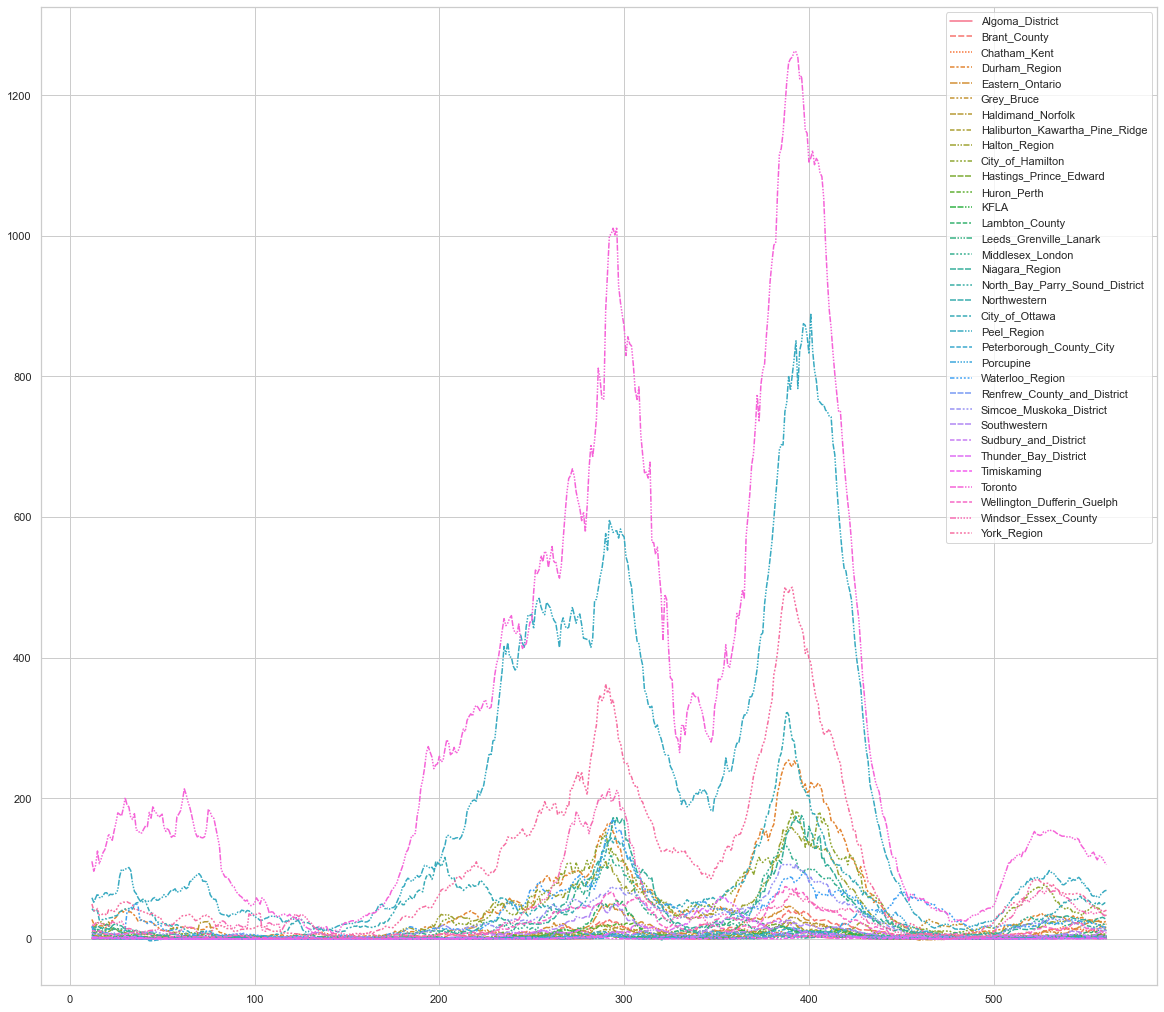

In [43]:
plt.figure(figsize=(20,18))
sns.set_theme(style="whitegrid", palette="colorblind")
sns.lineplot(data = phu_daily_avg_df)

We realize that it is hard to show the trend for specific regions.

In order to do that, we would like to focus on top 4 regions with top average daily cases:

In [44]:
phu_daily_df.mean().sort_values(ascending=False)

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_40306/3503816743.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  phu_daily_df.mean().sort_values(ascending=False)


Total                             1048.364769
Toronto                            311.432916
Peel_Region                        205.118068
York_Region                        101.270125
City_of_Ottawa                      53.801431
Durham_Region                       48.511628
City_of_Hamilton                    44.066190
Windsor_Essex_County                35.602862
Waterloo_Region                     35.289803
Halton_Region                       33.792487
Niagara_Region                      31.710197
Middlesex_London                    25.220036
Simcoe_Muskoka_District             24.457961
Wellington_Dufferin_Guelph          16.304114
Eastern_Ontario                      9.508050
Brant_County                         8.012522
Southwestern                         7.788909
Lambton_County                       7.044723
Thunder_Bay_District                 6.073345
Haldimand_Norfolk                    5.194991
Chatham_Kent                         4.538462
Haliburton_Kawartha_Pine_Ridge    

The regions with top 4 daily COVID-19 cases are Toronto, Peel, York and Ottawa.

First we stack the data from different regions for graphing:

In [45]:
phu_top_four_df = phu_daily_avg_df[['Date','Toronto','Peel_Region','York_Region','City_of_Ottawa']]
phu_top_four_df.set_index('Date', inplace=True)
phu_top_four_stack_df = pd.DataFrame(phu_top_four_df.stack().reset_index())
phu_top_four_stack_df.rename(columns={'level_1':'PHU',0:'7day_avg_infc'}, inplace=True)
print(phu_top_four_stack_df.head(5))

        Date             PHU  7day_avg_infc
0 2020-04-05         Toronto     110.428571
1 2020-04-05     Peel_Region      58.571429
2 2020-04-05     York_Region      49.714286
3 2020-04-05  City_of_Ottawa      43.000000
4 2020-04-06         Toronto      96.285714


Then use ```Seaborn``` for graphing:


<AxesSubplot:xlabel='Date', ylabel='7day_avg_infc'>

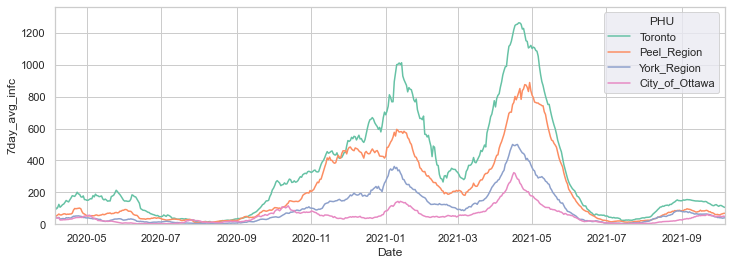

In [46]:
fig = plt.figure(figsize=(12,4))
plt.xlim(phu_top_four_stack_df.Date.min(),phu_top_four_stack_df.Date.max())
plt.ylim(0,phu_top_four_stack_df['7day_avg_infc'].max()+100)
sns.set_theme(style='darkgrid', palette='Set2')
sns.lineplot(data=phu_top_four_stack_df, x = 'Date', y = '7day_avg_infc', hue='PHU')

Separate to 4 small plots:

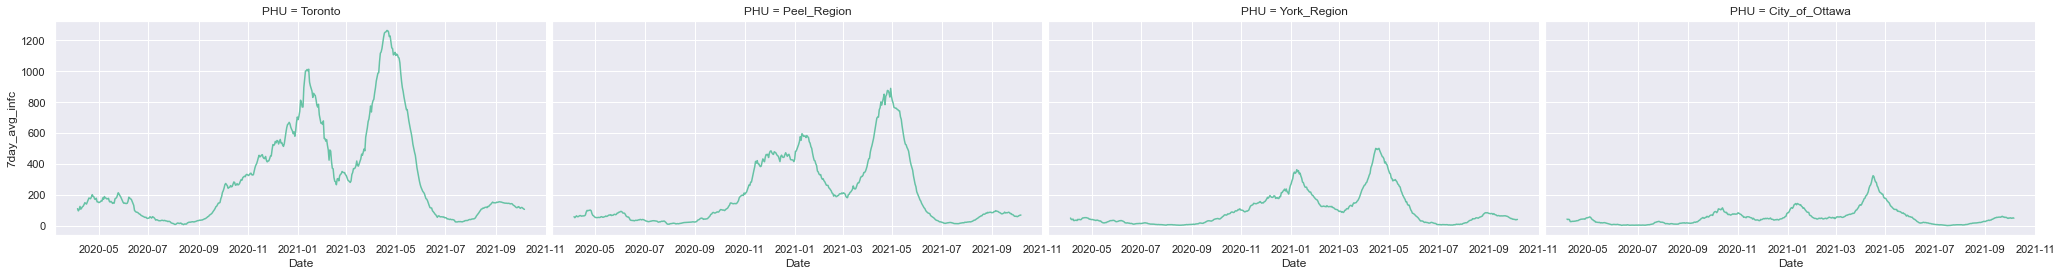

In [47]:
sns.set_theme(style='darkgrid', palette='Set2')
fig = sns.FacetGrid(data=phu_top_four_stack_df, col='PHU', margin_titles=True, despine=False, height=4, aspect=1.8)
fig.map(sns.lineplot, 'Date', '7day_avg_infc')
fig.figure.subplots_adjust(wspace=0.01)

Calculate the daily change rate of four different health regions:

In [48]:
phu_top_four_pct_df = phu_top_four_df.pct_change().dropna()
phu_four_reg_pct_stack = pd.DataFrame(phu_top_four_pct_df.stack()).reset_index()
phu_four_reg_pct_stack.rename(columns={'level_1':'PHU',0:'avg_inf'}, inplace=True)
print(phu_four_reg_pct_stack.head(5))

        Date             PHU   avg_inf
0 2020-04-06         Toronto -0.128072
1 2020-04-06     Peel_Region -0.109756
2 2020-04-06     York_Region -0.186782
3 2020-04-06  City_of_Ottawa -0.076412
4 2020-04-07         Toronto  0.089021


Use the same method to plot in order to compare trend:

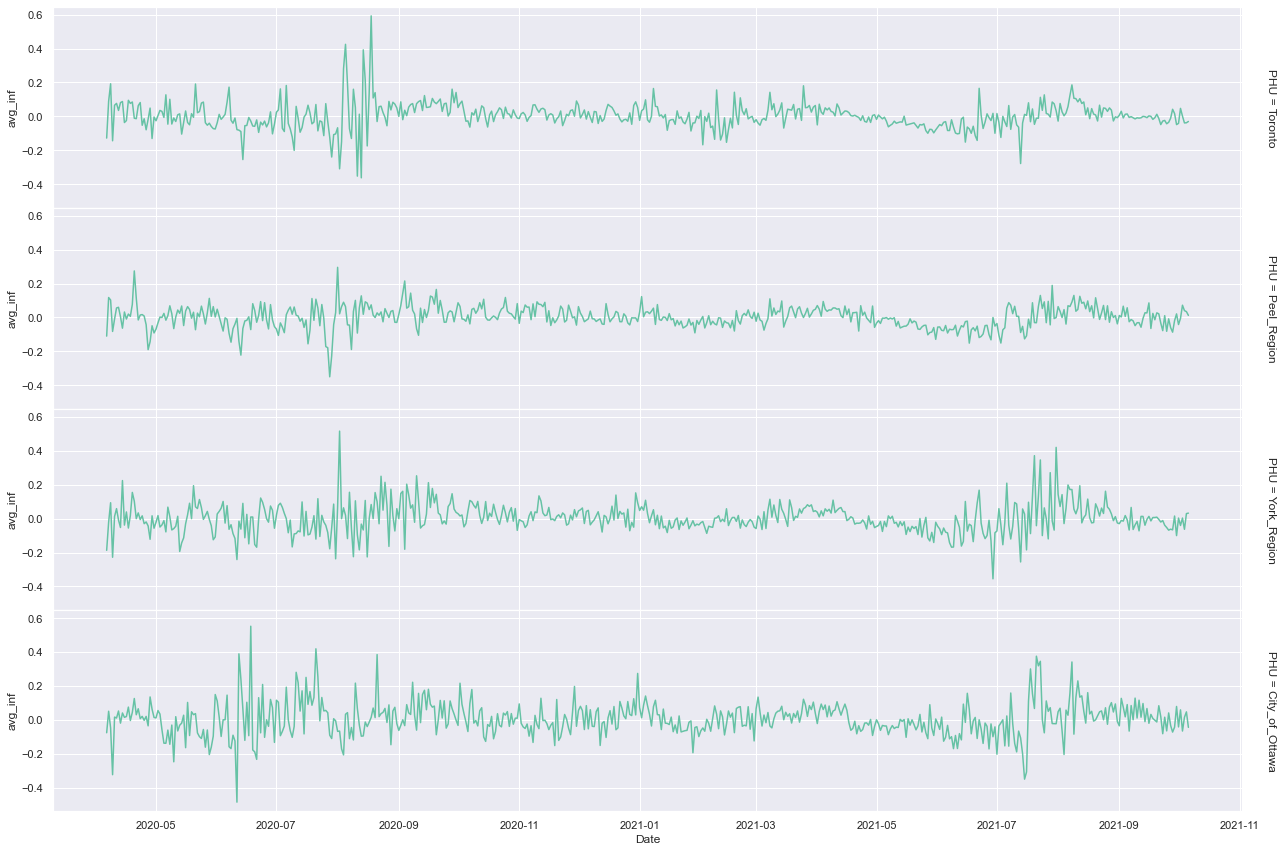

In [49]:
sns.set_theme(style='darkgrid', palette='Set2')
fig = sns.FacetGrid(data=phu_four_reg_pct_stack, row='PHU', margin_titles=True, despine=False, height=3, aspect=6)
fig.map(sns.lineplot, 'Date', 'avg_inf')
fig.figure.subplots_adjust(hspace=0)

For the past 30 days:

<AxesSubplot:xlabel='Date', ylabel='avg_inf'>

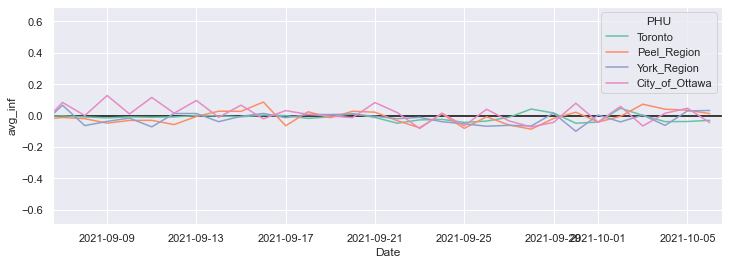

In [50]:
fig = plt.figure(figsize=(12,4))
plt.xlim(np.datetime64(datetime.today()) - np.timedelta64(30, 'D'),np.datetime64(datetime.today()))
plt.ylim(-phu_four_reg_pct_stack.avg_inf.max()-0.1,phu_four_reg_pct_stack.avg_inf.max()+0.1)
sns.set_theme(style='darkgrid', palette='Set2')
plt.axhline(y=0, color='black')
sns.lineplot(data=phu_four_reg_pct_stack, x = 'Date', y = 'avg_inf', hue='PHU')

<AxesSubplot:xlabel='Date', ylabel='7day_avg_infc'>

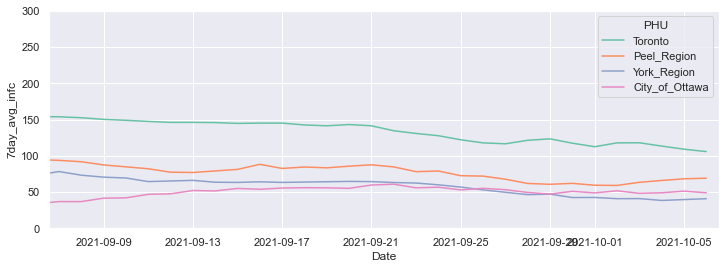

In [51]:
fig = plt.figure(figsize=(12,4))
plt.xlim(np.datetime64(datetime.today()) - np.timedelta64(30, 'D'),np.datetime64(datetime.today()))
plt.ylim(0,300)
sns.set_theme(style='darkgrid', palette='Set2')
sns.lineplot(data=phu_top_four_stack_df, x = 'Date', y = '7day_avg_infc', hue='PHU')

We can see that as the infection cases go up in Ontario, the daily new infected patient in Toronto, Peel and York Region are not significantly increased at lease for the past two weeks. Use the following methods to find out which region have the highest increase rate:

In [52]:
phu_pct_df = phu_daily_df.iloc[:,1:].pct_change()
phu_pct_df['Date'] = phu_daily_df.Date

#Calculate the region with highest increasing rate for the past week:
phu_pct_df[phu_pct_df.Date > np.datetime64(datetime.today()) - np.timedelta64(7, 'D')].sum().sort_values(ascending=False)

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_40306/1285918203.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  phu_pct_df[phu_pct_df.Date > np.datetime64(datetime.today()) - np.timedelta64(7, 'D')].sum().sort_values(ascending=False)


Algoma_District                         inf
Leeds_Grenville_Lanark                  inf
Timiskaming                             inf
Grey_Bruce                              inf
Haldimand_Norfolk                       inf
Haliburton_Kawartha_Pine_Ridge          inf
Renfrew_County_and_District             inf
Porcupine                               inf
Peterborough_County_City                inf
KFLA                                    inf
Brant_County                      15.901587
Sudbury_and_District              12.459524
Eastern_Ontario                    5.266359
Durham_Region                      3.445431
North_Bay_Parry_Sound_District     2.666667
Northwestern                       2.166667
Southwestern                       1.791369
Huron_Perth                        1.656349
Lambton_County                     1.611111
Simcoe_Muskoka_District            1.470795
Windsor_Essex_County               1.432540
Wellington_Dufferin_Guelph         1.153151
Peel_Region                     

In order to make sense of the infinite value, make a pseudo dataset where we replace 0 to 0.1, then rank the infection case increasing rate for the past week:

In [53]:
pseudo_phu_df = phu_daily_df.replace(0,0.8)

#Percentage Change:
pseudo_phu_pct_df = pseudo_phu_df.iloc[:,1:].pct_change()
pseudo_phu_pct_df['Date'] = pseudo_phu_df.Date

#Region increasing rate ranking for the past 7 days:
phu_change_rate = pseudo_phu_pct_df[pseudo_phu_pct_df.Date > np.datetime64(datetime.today())-np.timedelta64(7,'D')].sum().sort_values(ascending=False)
phu_change_rate

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_40306/847449014.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  phu_change_rate = pseudo_phu_pct_df[pseudo_phu_pct_df.Date > np.datetime64(datetime.today())-np.timedelta64(7,'D')].sum().sort_values(ascending=False)


Brant_County                      15.901587
Sudbury_and_District              12.459524
Grey_Bruce                         6.950000
Peterborough_County_City           5.943333
Leeds_Grenville_Lanark             5.778571
Renfrew_County_and_District        5.683333
Eastern_Ontario                    5.266359
KFLA                               4.066667
Durham_Region                      3.445431
North_Bay_Parry_Sound_District     2.666667
Northwestern                       2.300000
Haldimand_Norfolk                  1.830952
Southwestern                       1.791369
Huron_Perth                        1.656349
Lambton_County                     1.611111
Simcoe_Muskoka_District            1.470795
Windsor_Essex_County               1.432540
Timiskaming                        1.300000
Wellington_Dufferin_Guelph         1.153151
Peel_Region                        1.009274
Waterloo_Region                    0.901874
Hastings_Prince_Edward             0.872222
Chatham_Kent                    

Using ```wordcloud``` to  see which public health district has the highest COVID-19 daily new case increasing rate:

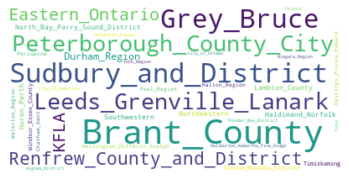

In [54]:
phu_change_rate_df = pd.DataFrame(phu_change_rate)
phu_change_rate_df.columns = ['change_rate']

text = ' '.join(phu for phu in phu_change_rate_df.index)
wc = wordcloud.WordCloud(background_color='white').generate(text=text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
'''
Here we can get a list of health regions
that with daily case count increasing rate
higher than provincial average:
'''
abov_avg_phu = phu_change_rate[phu_change_rate.values>phu_change_rate['Total']]
phu_list = np.array(abov_avg_phu.index)
phu_list


array(['Brant_County', 'Sudbury_and_District', 'Grey_Bruce',
       'Peterborough_County_City', 'Leeds_Grenville_Lanark',
       'Renfrew_County_and_District', 'Eastern_Ontario', 'KFLA',
       'Durham_Region', 'North_Bay_Parry_Sound_District', 'Northwestern',
       'Haldimand_Norfolk', 'Southwestern', 'Huron_Perth',
       'Lambton_County', 'Simcoe_Muskoka_District',
       'Windsor_Essex_County', 'Timiskaming',
       'Wellington_Dufferin_Guelph', 'Peel_Region', 'Waterloo_Region',
       'Hastings_Prince_Edward', 'Chatham_Kent', 'Halton_Region',
       'Porcupine', 'Middlesex_London', 'York_Region', 'City_of_Hamilton'],
      dtype=object)

## Vaccination Data Analysis
Data from Ontario OpenData [COVID-19 Vaccine data by Public Health Unit](https://data.ontario.ca/dataset/covid-19-vaccine-data-in-ontario/resource/2a362139-b782-43b1-b3cb-078a2ef19524), updated daily.

In [56]:
#Data from Ontario OpenData, updated daily
on_vaxx_df = df_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/2a362139-b782-43b1-b3cb-078a2ef19524/download/vaccines_by_age_phu.csv')
on_vaxx_df['Date'] = pd.to_datetime(on_vaxx_df.Date)
on_vaxx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28094 entries, 0 to 28093
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          28094 non-null  datetime64[ns]
 1   PHU ID                        28094 non-null  int64         
 2   PHU name                      28094 non-null  object        
 3   Agegroup                      28094 non-null  object        
 4   At least one dose_cumulative  28094 non-null  int64         
 5   Second_dose_cumulative        27688 non-null  float64       
 6   Total population              28094 non-null  int64         
 7   Percent_at_least_one_dose     24820 non-null  float64       
 8   Percent_fully_vaccinated      24820 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 1.9+ MB


In [57]:
on_vaxx_df.Date

0       2021-07-26
1       2021-07-26
2       2021-07-26
3       2021-07-26
4       2021-07-26
           ...    
28089   2021-10-06
28090   2021-10-06
28091   2021-10-06
28092   2021-10-06
28093   2021-10-06
Name: Date, Length: 28094, dtype: datetime64[ns]

In [58]:
#Find the most recent data:

on_vaxx_rn_df = on_vaxx_df[on_vaxx_df.Date == np.datetime64(datetime.today().date())]
on_vaxx_rn_df

,Date,PHU ID,PHU name,Agegroup,At least one dose_cumulative,Second_dose_cumulative,Total population,Percent_at_least_one_dose,Percent_fully_vaccinated
27709,2021-10-06,2226,ALGOMA DISTRICT,12-17yrs,5092,4469.0,6504,0.7829,0.6871
27710,2021-10-06,2227,BRANT COUNTY,12-17yrs,8002,7053.0,10734,0.7455,0.6571
27711,2021-10-06,2240,CHATHAM-KENT,12-17yrs,4642,3912.0,7233,0.6418,0.5409
27712,2021-10-06,2237,CITY OF HAMILTON,12-17yrs,29229,25549.0,37018,0.7896,0.6902
27713,2021-10-06,2251,CITY OF OTTAWA,12-17yrs,61776,56558.0,66222,0.9329,0.8541
...,...,...,...,...,...,...,...,...,...
28089,2021-10-06,9999,UNKNOWN,Undisclosed_or_missing,42,24.0,0,NaN,NaN
28090,2021-10-06,2265,WATERLOO REGION,Undisclosed_or_missing,19,5.0,0,NaN,NaN
28091,2021-10-06,2266,WELLINGTON-DUFFERIN-GUELPH,Undisclosed_or_missing,17,5.0,0,NaN,NaN
28092,2021-10-06,2268,WINDSOR-ESSEX COUNTY,Undisclosed_or_missing,21,7.0,0,NaN,NaN


In [59]:
pd.value_counts(on_vaxx_rn_df['Agegroup'])

12-17yrs                  35
18-29yrs                  35
30-39yrs                  35
40-49yrs                  35
50-59yrs                  35
60-69yrs                  35
70-79yrs                  35
80+                       35
Adults_18plus             35
Ontario_12plus            35
Undisclosed_or_missing    35
Name: Agegroup, dtype: int64

In [60]:
#First we ignore the age group difference, focus on the district
on_vaxx_rn_df = on_vaxx_rn_df[on_vaxx_rn_df.Agegroup == 'Ontario_12plus']
on_vaxx_piv = pd.pivot_table(data=on_vaxx_rn_df, values=['At least one dose_cumulative','Second_dose_cumulative','Total population'], index=['PHU ID','PHU name'], aggfunc=np.sum)
on_vaxx_piv

,,At least one dose_cumulative,Second_dose_cumulative,Total population
PHU ID,PHU name,,,
2226,ALGOMA DISTRICT,89621,84070.0,101417
2227,BRANT COUNTY,114055,106882.0,134281
2230,DURHAM REGION,545661,518916.0,617305
2233,GREY BRUCE,125709,119676.0,149060
2234,HALDIMAND-NORFOLK,84580,79444.0,100272
2235,"HALIBURTON, KAWARTHA, PINE RIDGE",148784,140060.0,170498
2236,HALTON REGION,475107,455852.0,533442
2237,CITY OF HAMILTON,434832,406212.0,519560
2238,HASTINGS & PRINCE EDWARD COUNTIES,127859,119163.0,149606


In [61]:
#Calculate the percentage
on_vaxx_piv['one_dose_pect'] = on_vaxx_piv['At least one dose_cumulative']/on_vaxx_piv['Total population']
on_vaxx_piv['full_vaxx_pect'] = on_vaxx_piv['Second_dose_cumulative']/on_vaxx_piv['Total population']
on_vaxx_piv.sort_values(by='full_vaxx_pect', ascending=False, inplace=True)
on_vaxx_piv.reset_index(inplace=True)
on_vaxx_piv

,PHU ID,PHU name,At least one dose_cumulative,Second_dose_cumulative,Total population,one_dose_pect,full_vaxx_pect
0,9999,UNKNOWN,12632,6490.0,0,inf,inf
1,2243,"LEEDS, GRENVILLE AND LANARK DISTRICT",148458,141651.0,154361,0.961758,0.917661
2,2262,THUNDER BAY DISTRICT,120939,113170.0,131784,0.917706,0.858754
3,2236,HALTON REGION,475107,455852.0,533442,0.890644,0.854548
4,2265,WATERLOO REGION,456873,432193.0,506304,0.902369,0.853624
5,5183,HURON PERTH,107790,102330.0,120844,0.891976,0.846794
6,2251,CITY OF OTTAWA,824648,781180.0,922751,0.893684,0.846577
7,2244,MIDDLESEX-LONDON,397554,373682.0,444194,0.895001,0.841259
8,2230,DURHAM REGION,545661,518916.0,617305,0.883941,0.840615
9,2266,WELLINGTON-DUFFERIN-GUELPH,237719,226216.0,270024,0.880362,0.837763


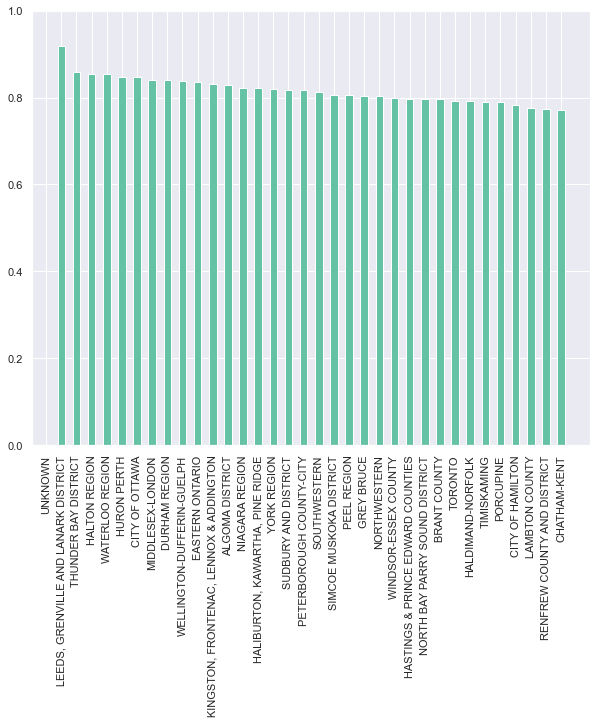

In [62]:
plt.figure(figsize=(10,8))
plt.bar(data=on_vaxx_piv,x='PHU name',height='full_vaxx_pect', width=0.5)
plt.ylim(0,1)
#put x label vertical for easier visual
plt.xticks(ticks=range(len(on_vaxx_piv)), labels=on_vaxx_piv['PHU name'], rotation=90)
plt.show()

## Correlation of Vaccination Rate and Daily Case Percentage Change

In [63]:
'''
Find Correlation between
vaccination rate and
covid case increasing rate:
'''

#prepare data for plotting
on_vaxx_piv.drop(labels=0, inplace=True)

In [64]:
on_vaxx_piv.sort_values(by='PHU name', inplace=True)
on_vaxx_piv.reset_index(inplace=True)
len(on_vaxx_piv)

34

In [65]:
phu_sum = phu_daily_df.set_index('Date')
phu_sum.fillna(0,inplace=True)
phu_sum = phu_sum.cumsum()
phu_sum=phu_sum.pct_change().dropna()
#consider the average of previous 2 weeks
phu_sum=phu_sum[phu_sum.index>(np.datetime64(datetime.today().date())-np.timedelta64(14,'D'))]
phu_mean=pd.DataFrame(phu_sum.mean())
phu_mean.reset_index(inplace=True)
phu_mean.drop(labels=34, inplace=True)
phu_mean.columns=['phu','rate']
phu_mean.sort_values(by='phu', inplace=True)
phu_mean.reset_index(inplace=True)
len(phu_mean)

34

In [66]:
#join two tables
phu_vax_n_chg = phu_mean.copy()
phu_vax_n_chg['PHU name'] = on_vaxx_piv['PHU name']
phu_vax_n_chg['one_dose_pct'] = on_vaxx_piv['one_dose_pect']
phu_vax_n_chg['full_vax_pct'] = on_vaxx_piv['full_vaxx_pect']
phu_vax_n_chg

,index,phu,rate,PHU name,one_dose_pct,full_vax_pct
0,0,Algoma_District,0.001376,ALGOMA DISTRICT,0.883688,0.828954
1,1,Brant_County,0.002025,BRANT COUNTY,0.849376,0.795958
2,2,Chatham_Kent,0.005793,CHATHAM-KENT,0.833180,0.770867
3,9,City_of_Hamilton,0.001644,CITY OF HAMILTON,0.836924,0.781838
4,19,City_of_Ottawa,0.001620,CITY OF OTTAWA,0.893684,0.846577
5,3,Durham_Region,0.000982,DURHAM REGION,0.883941,0.840615
6,4,Eastern_Ontario,0.004376,EASTERN ONTARIO,0.891858,0.835964
7,5,Grey_Bruce,0.000886,GREY BRUCE,0.843345,0.802871
8,6,Haldimand_Norfolk,0.001066,HALDIMAND-NORFOLK,0.843506,0.792285
9,7,Haliburton_Kawartha_Pine_Ridge,0.001151,"HALIBURTON, KAWARTHA, PINE RIDGE",0.872644,0.821476


<AxesSubplot:xlabel='rate', ylabel='full_vax_pct'>

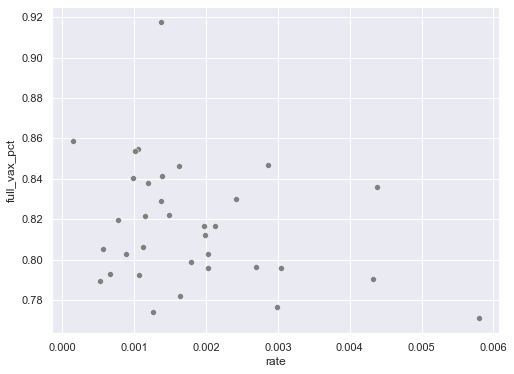

In [67]:
'''
plot seaborn.scatterplot between vaccination rate
and recent daily positive case change rate
'''

plt.figure(figsize=(8,6))
sns.scatterplot(data=phu_vax_n_chg, x='rate', y='full_vax_pct', markers='*', color='grey')

<Figure size 576x432 with 0 Axes>

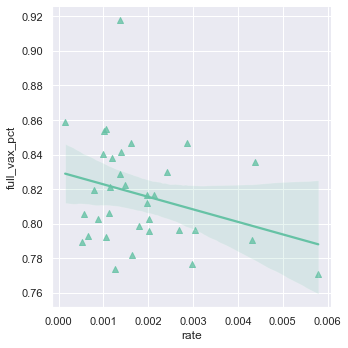

In [68]:
plt.figure(figsize=(8,6))
sns.lmplot(data=phu_vax_n_chg, x='rate', y='full_vax_pct',markers='^')

## Case Rate by Vaccination Status
Data source credit to [Ontario Government Open Data](https://data.ontario.ca/dataset/covid-19-vaccine-data-in-ontario/resource/c08620e0-a055-4d35-8cec-875a459642c3)

In [69]:
on_rate_by_vax = df_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/c08620e0-a055-4d35-8cec-875a459642c3/download/cases_by_age_vac_status.csv')
#Use the most up to date data
on_rate_by_vax['date'] = pd.to_datetime(on_rate_by_vax.date)
on_rate_by_vax = on_rate_by_vax[on_rate_by_vax.date == np.datetime64(datetime.now().date())]
on_rate_by_vax

,date,agegroup,cases_unvac_rate_per100K,cases_partial_vac_rate_per100K,cases_full_vac_rate_per100K,cases_unvac_rate_7ma,cases_partial_vac_rate_7ma,cases_full_vac_rate_7ma
161,2021-10-06,0-11yrs,4.55,0.00,0.00,5.85,-0.00,0.00
162,2021-10-06,12-17yrs,14.09,0.00,0.29,12.42,4.30,0.78
163,2021-10-06,18-39yrs,10.36,1.28,1.30,11.87,4.38,1.82
164,2021-10-06,40-59yrs,11.29,3.80,1.90,12.18,4.46,1.70
165,2021-10-06,60-79yrs,19.19,1.40,1.34,14.73,1.94,1.20
166,2021-10-06,80+,17.73,0.00,0.16,55.09,0.74,1.25
167,2021-10-06,ALL,8.20,1.69,1.36,9.19,3.99,1.52


In [70]:
on_rate_by_vax.set_index('agegroup',inplace=True)

In [71]:
on_rate_by_vax.drop(columns=['date'],inplace=True)
on_rate_by_vax

,cases_unvac_rate_per100K,cases_partial_vac_rate_per100K,cases_full_vac_rate_per100K,cases_unvac_rate_7ma,cases_partial_vac_rate_7ma,cases_full_vac_rate_7ma
agegroup,,,,,,
0-11yrs,4.55,0.00,0.00,5.85,-0.00,0.00
12-17yrs,14.09,0.00,0.29,12.42,4.30,0.78
18-39yrs,10.36,1.28,1.30,11.87,4.38,1.82
40-59yrs,11.29,3.80,1.90,12.18,4.46,1.70
60-79yrs,19.19,1.40,1.34,14.73,1.94,1.20
80+,17.73,0.00,0.16,55.09,0.74,1.25
ALL,8.20,1.69,1.36,9.19,3.99,1.52


In [72]:
#Stack the data for ploting
rate_by_vax_stkdf = pd.DataFrame(on_rate_by_vax.stack())
rate_by_vax_stkdf.reset_index(inplace=True)
rate_by_vax_stkdf

,agegroup,level_1,0
0,0-11yrs,cases_unvac_rate_per100K,4.55
1,0-11yrs,cases_partial_vac_rate_per100K,0.00
2,0-11yrs,cases_full_vac_rate_per100K,0.00
3,0-11yrs,cases_unvac_rate_7ma,5.85
4,0-11yrs,cases_partial_vac_rate_7ma,-0.00
5,0-11yrs,cases_full_vac_rate_7ma,0.00
6,12-17yrs,cases_unvac_rate_per100K,14.09
7,12-17yrs,cases_partial_vac_rate_per100K,0.00
8,12-17yrs,cases_full_vac_rate_per100K,0.29
9,12-17yrs,cases_unvac_rate_7ma,12.42


In [73]:
#name the columns
rate_by_vax_stkdf.columns = ['age_group','cases_per_100k','rate']
rate_by_vax_stkdf

,age_group,cases_per_100k,rate
0,0-11yrs,cases_unvac_rate_per100K,4.55
1,0-11yrs,cases_partial_vac_rate_per100K,0.00
2,0-11yrs,cases_full_vac_rate_per100K,0.00
3,0-11yrs,cases_unvac_rate_7ma,5.85
4,0-11yrs,cases_partial_vac_rate_7ma,-0.00
5,0-11yrs,cases_full_vac_rate_7ma,0.00
6,12-17yrs,cases_unvac_rate_per100K,14.09
7,12-17yrs,cases_partial_vac_rate_per100K,0.00
8,12-17yrs,cases_full_vac_rate_per100K,0.29
9,12-17yrs,cases_unvac_rate_7ma,12.42


<AxesSubplot:xlabel='age_group', ylabel='rate'>

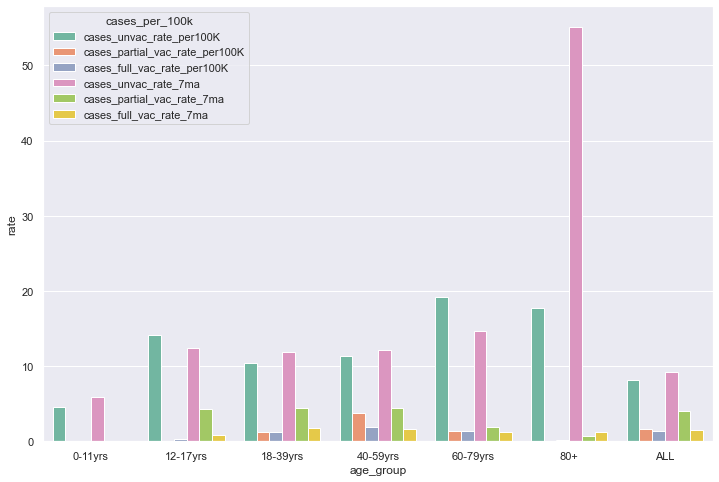

In [74]:
#ploting bar chart
plt.figure(figsize=(12,8))
sns.barplot(data=rate_by_vax_stkdf,y='rate',x='age_group',hue='cases_per_100k')